In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
raw_df = pd.read_csv(r"..\\raw_data_30m\\currency_pairs\\GBPJPY_M30.csv", sep='\t')

In [12]:
raw_df = raw_df[-100000:]
raw_df.reset_index(inplace=True)

In [24]:
df = raw_df.drop(['index', 'Time'], axis=1)

In [25]:
df

,Open,High,Low,Close,Volume,typical_price
0,177.783,177.988,177.743,177.983,3148,0
1,177.983,178.113,177.802,177.847,3861,0
2,177.845,177.982,177.732,177.841,3443,0
3,177.844,178.021,177.799,178.005,2756,0
4,177.996,178.272,177.947,178.243,2596,0
...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,0
99996,158.553,158.590,158.478,158.484,2185,0
99997,158.480,158.527,158.412,158.450,2411,0
99998,158.449,158.462,158.370,158.426,1599,0


In [23]:
df['typical_price'] = 0

In [32]:
tp = (df['High']+df['Close']+df['Low'])/3
df['typical_price'] = tp.round(3)


In [33]:
df

,Open,High,Low,Close,Volume,typical_price,total_typical_price
0,177.783,177.988,177.743,177.983,3148,177.905,560043.890667
1,177.983,178.113,177.802,177.847,3861,177.921,686951.694000
2,177.845,177.982,177.732,177.841,3443,177.852,612343.288333
3,177.844,178.021,177.799,178.005,2756,177.942,490407.233333
4,177.996,178.272,177.947,178.243,2596,178.154,462487.784000
...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.549,377187.278000
99996,158.553,158.590,158.478,158.484,2185,158.517,346360.373333
99997,158.480,158.527,158.412,158.450,2411,158.463,382054.293000
99998,158.449,158.462,158.370,158.426,1599,158.419,253312.514000


In [34]:
df['total_typical_price']= 0

In [35]:
ttp = df['typical_price'] * df['Volume']
df['total_typical_price'] = ttp.round(3)

In [36]:
df

,Open,High,Low,Close,Volume,typical_price,total_typical_price
0,177.783,177.988,177.743,177.983,3148,177.905,560044.940
1,177.983,178.113,177.802,177.847,3861,177.921,686952.981
2,177.845,177.982,177.732,177.841,3443,177.852,612344.436
3,177.844,178.021,177.799,178.005,2756,177.942,490408.152
4,177.996,178.272,177.947,178.243,2596,178.154,462487.784
...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.549,377188.071
99996,158.553,158.590,158.478,158.484,2185,158.517,346359.645
99997,158.480,158.527,158.412,158.450,2411,158.463,382054.293
99998,158.449,158.462,158.370,158.426,1599,158.419,253311.981


In [38]:
df.dtypes

Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
typical_price          float64
total_typical_price    float64
dtype: object

In [42]:
volume_week = []
for i in range(230, len(df), 230):
    k = i - 230
    temp = 0
    for j in range(k, i):
        temp += df.loc[j, 'Volume']  # access the 'Volume' value for the j-th row
    volume_week.append(temp)
    
# add the volume of the last period (if any)
if len(df) % 230 != 0:
    temp = 0
    for j in range(len(df) - len(df) % 230, len(df)):
        temp += df.loc[j, 'Volume']
    volume_week.append(temp)

In [57]:
volume_week

[1310751,
 1166436,
 1110500,
 865757,
 869317,
 949624,
 956683,
 978841,
 738541,
 831718,
 857472,
 867570,
 943835,
 1050950,
 1154139,
 1086581,
 729903,
 937598,
 933017,
 856147,
 747690,
 808152,
 862236,
 845158,
 700966,
 700828,
 714389,
 726209,
 760151,
 1030485,
 1074014,
 930019,
 983823,
 937131,
 978746,
 969136,
 839071,
 825718,
 758256,
 796756,
 731526,
 778157,
 770275,
 686177,
 795008,
 964132,
 982004,
 813927,
 497672,
 1010175,
 1152146,
 1335634,
 1205522,
 1291344,
 1536375,
 1449977,
 1228542,
 1176227,
 1126912,
 1129905,
 1118532,
 749026,
 1029577,
 1157744,
 924119,
 1021619,
 1054408,
 936972,
 914059,
 916462,
 852897,
 863953,
 874532,
 971439,
 1067453,
 1178929,
 900477,
 1104433,
 1212149,
 2529079,
 2378062,
 1459675,
 1353557,
 1645195,
 1556163,
 1964845,
 2021924,
 1936450,
 2210547,
 2181629,
 2286162,
 1809427,
 1519281,
 783943,
 1010031,
 1338369,
 1160388,
 1087292,
 1164227,
 1060469,
 1053121,
 949605,
 607189,
 871169,
 1213337,
 1238

In [46]:
df['VWAP'] = 0

In [55]:
for i in range(len(volume_week)):
    m = i*230 if i == 0 else i*230 -1
    n = min(len(volume_week), (i+1)*230 -1 )
    for j in range(m, n):
        df.loc[j, 'VWAP'] = df.loc[j, 'total_typical_price'] / volume_week[i]

In [61]:
df = df.drop('VWAP', axis=1)

In [62]:
df

,Open,High,Low,Close,Volume,typical_price,total_typical_price
0,177.783,177.988,177.743,177.983,3148,177.905,560044.940
1,177.983,178.113,177.802,177.847,3861,177.921,686952.981
2,177.845,177.982,177.732,177.841,3443,177.852,612344.436
3,177.844,178.021,177.799,178.005,2756,177.942,490408.152
4,177.996,178.272,177.947,178.243,2596,178.154,462487.784
...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.549,377188.071
99996,158.553,158.590,158.478,158.484,2185,158.517,346359.645
99997,158.480,158.527,158.412,158.450,2411,158.463,382054.293
99998,158.449,158.462,158.370,158.426,1599,158.419,253311.981


In [64]:
from ta.volume import VolumeWeightedAveragePrice

# ...
def vwap(dataframe, label='VWAP', window=3, fillna=True):
        dataframe[label] = VolumeWeightedAveragePrice(high=df['High'], low=dataframe['Low'], close=dataframe["Close"], volume=dataframe['Volume'], window=window, fillna=fillna).volume_weighted_average_price()
        return dataframe

In [65]:
vwap(df)

,Open,High,Low,Close,Volume,typical_price,total_typical_price,VWAP
0,177.783,177.988,177.743,177.983,3148,177.905,560044.940,177.904667
1,177.983,178.113,177.802,177.847,3861,177.921,686952.981,177.913480
2,177.845,177.982,177.732,177.841,3443,177.852,612344.436,177.893118
3,177.844,178.021,177.799,178.005,2756,177.942,490408.152,177.902805
4,177.996,178.272,177.947,178.243,2596,178.154,462487.784,177.969108
...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.549,377188.071,158.484329
99996,158.553,158.590,158.478,158.484,2185,158.517,346359.645,158.516696
99997,158.480,158.527,158.412,158.450,2411,158.463,382054.293,158.509239
99998,158.449,158.462,158.370,158.426,1599,158.419,253311.981,158.470893


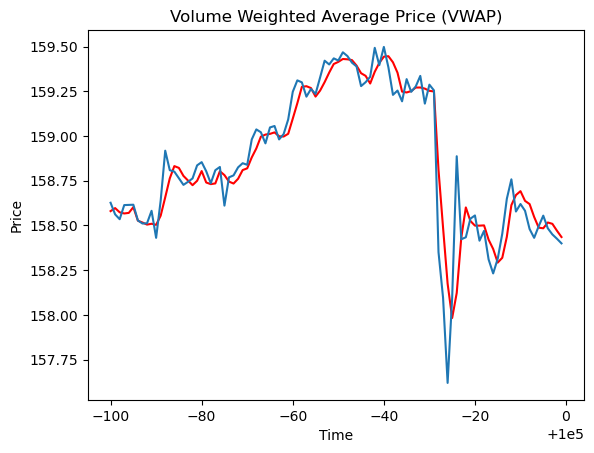

In [69]:
plt.plot(df['VWAP'][-100:], 'r')
plt.title('Volume Weighted Average Price (VWAP)')
plt.xlabel('Time')
plt.plot(df['Close'][-100:])
plt.ylabel('Price')
plt.show()

In [74]:
df['Trend'] = [1 if row['Close'] > row['VWAP'] + 0.001 * row['Close']
                        else -1 if row['Close'] < row['VWAP'] - 0.001 * row['Close']
                        else 0 for index, row in df.iterrows()]

In [75]:
df

,Open,High,Low,Close,Volume,typical_price,total_typical_price,VWAP,Trend
0,177.783,177.988,177.743,177.983,3148,177.905,560044.940,177.904667,0
1,177.983,178.113,177.802,177.847,3861,177.921,686952.981,177.913480,0
2,177.845,177.982,177.732,177.841,3443,177.852,612344.436,177.893118,0
3,177.844,178.021,177.799,178.005,2756,177.942,490408.152,177.902805,0
4,177.996,178.272,177.947,178.243,2596,178.154,462487.784,177.969108,1
...,...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.549,377188.071,158.484329,0
99996,158.553,158.590,158.478,158.484,2185,158.517,346359.645,158.516696,0
99997,158.480,158.527,158.412,158.450,2411,158.463,382054.293,158.509239,0
99998,158.449,158.462,158.370,158.426,1599,158.419,253311.981,158.470893,0


In [76]:
df.to_csv("..\\pre_processed_data\\VWAP\\GBPJPY_M30.csv")

In [77]:
final_df = df.drop(['typical_price', 'total_typical_price'], axis=1)

In [79]:
final_df.to_csv("..\\final_data\\VWAP\\GBPJPY_M30.csv")

In [2]:
final_df = pd.read_csv("..\\final_data\\VWAP\\GBPJPY_M30.csv")

In [3]:
final_df = final_df.drop(['Unnamed: 0', 'Open', 'High', 'Low'], axis=1)

In [4]:
final_df

,Close,Volume,VWAP,Trend
0,177.983,3148,177.904667,0
1,177.847,3861,177.913480,0
2,177.841,3443,177.893118,0
3,178.005,2756,177.902805,0
4,178.243,2596,177.969108,1
...,...,...,...,...
99995,158.555,2379,158.484329,0
99996,158.484,2185,158.516696,0
99997,158.450,2411,158.509239,0
99998,158.426,1599,158.470893,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

In [6]:
x0 = []
x1 = []
x2 = []
y = []

In [7]:
for i in range (0, final_df.shape[0] - 230):
    x0.append(final_df.iloc[i:i+230, 0])
    x1.append(final_df.iloc[i:i+230, 1])
    x2.append(final_df.iloc[i:i+230, 2])
    y.append(final_df.iloc[i+230, 3])

In [8]:
x0

[0      177.983
 1      177.847
 2      177.841
 3      178.005
 4      178.243
         ...   
 225    183.272
 226    183.257
 227    183.202
 228    183.180
 229    183.363
 Name: Close, Length: 230, dtype: float64,
 1      177.847
 2      177.841
 3      178.005
 4      178.243
 5      178.459
         ...   
 226    183.257
 227    183.202
 228    183.180
 229    183.363
 230    183.473
 Name: Close, Length: 230, dtype: float64,
 2      177.841
 3      178.005
 4      178.243
 5      178.459
 6      178.436
         ...   
 227    183.202
 228    183.180
 229    183.363
 230    183.473
 231    183.336
 Name: Close, Length: 230, dtype: float64,
 3      178.005
 4      178.243
 5      178.459
 6      178.436
 7      178.355
         ...   
 228    183.180
 229    183.363
 230    183.473
 231    183.336
 232    183.251
 Name: Close, Length: 230, dtype: float64,
 4      178.243
 5      178.459
 6      178.436
 7      178.355
 8      178.352
         ...   
 229    183.363
 230    183.

In [9]:
x0, x1, x2, y = np.array(x0), np.array(x1), np.array(x2), np.array(y)

In [14]:
y.shape

(99770,)

In [10]:
y=np.reshape(y, (len(y), 1))

In [11]:
y.shape

(99770, 1)

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
y = scaler.fit_transform(y)

In [44]:
y

array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]])

In [45]:
X = np.stack([x0, x1, x2], axis=2)

In [30]:
X.shape

(99770, 230, 3)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from keras import optimizers

In [46]:
# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [47]:
X_train.shape

(79816, 230, 3)

In [54]:
model = Sequential()

In [55]:
model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

# Compile the model with appropriate optimizer, loss function and metrics
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])


In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 230, 64)           17664     
                                                                 
 cu_dnnlstm_5 (CuDNNLSTM)    (None, 64)                33280     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 55,169
Trainable params: 55,169
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Train the model with your preprocessed data
model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=32)

Epoch 1/40
1996/1996 [==============================] - 67s 33ms/step - loss: 0.0396 - mae: 0.0893 - val_loss: 0.0408 - val_mae: 0.0901
Epoch 2/40
1996/1996 [==============================] - 65s 32ms/step - loss: 0.0390 - mae: 0.0882 - val_loss: 0.0407 - val_mae: 0.0836
Epoch 3/40
1996/1996 [==============================] - 65s 33ms/step - loss: 0.0390 - mae: 0.0886 - val_loss: 0.0407 - val_mae: 0.0825
Epoch 4/40
1996/1996 [==============================] - 65s 33ms/step - loss: 0.0390 - mae: 0.0885 - val_loss: 0.0411 - val_mae: 0.0988
Epoch 5/40
1996/1996 [==============================] - 65s 33ms/step - loss: 0.0390 - mae: 0.0884 - val_loss: 0.0408 - val_mae: 0.0896
Epoch 6/40
1996/1996 [==============================] - 65s 33ms/step - loss: 0.0390 - mae: 0.0882 - val_loss: 0.0415 - val_mae: 0.1057
Epoch 7/40
1996/1996 [==============================] - 65s 33ms/step - loss: 0.0390 - mae: 0.0881 - val_loss: 0.0410 - val_mae: 0.0966
Epoch 8/40
1996/1996 [==========================

In [58]:
model.save('..\models\\VWAP\\vwap-sigmoid-sgd.hdf5')

In [39]:
model = keras.models.load_model('..\models\\VWAP\\vwap-relu.hdf5')

OSError: No file or directory found at ..\models\VWAP\vwap-relu.hdf5

In [59]:
score = model.evaluate(X_test[-5000:], y_test[-5000:], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03962285444140434
Test accuracy: 0.09574101865291595


In [60]:
predictions = model.predict(X_test)
predictionsi = scaler.inverse_transform(predictions)

624/624 [==============================] - 9s 12ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

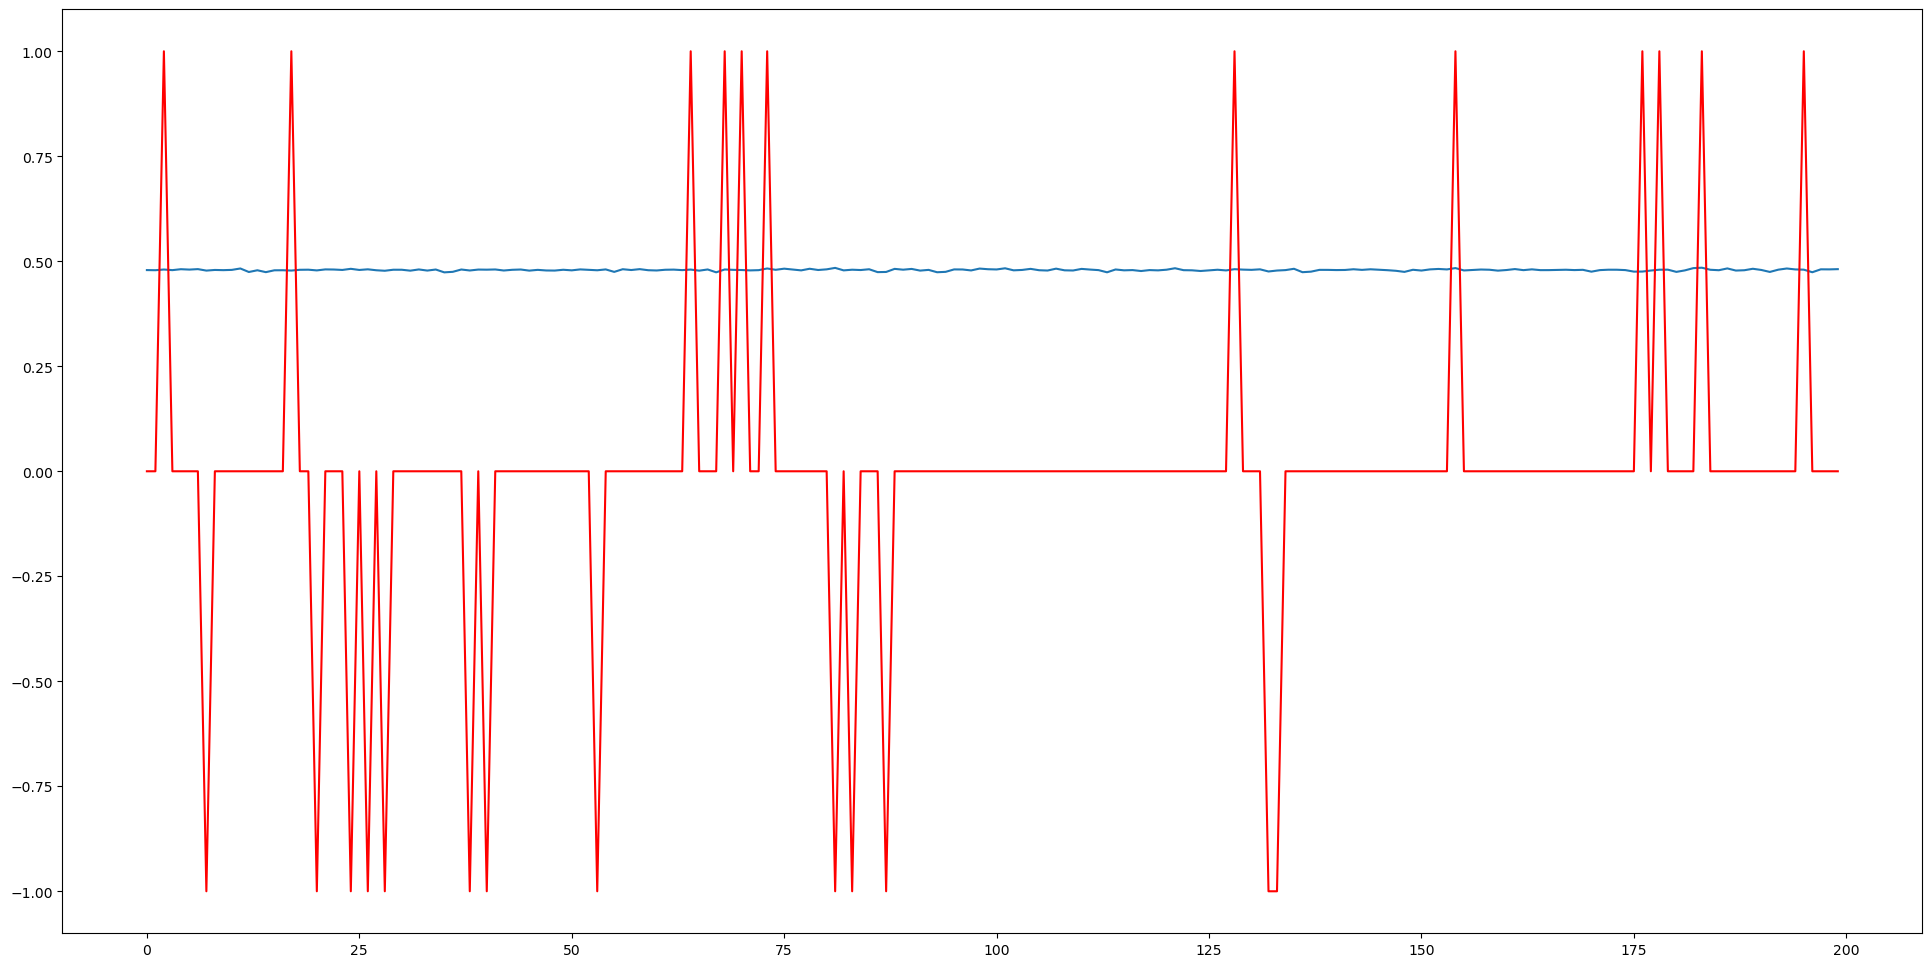

In [61]:
plt.figure(figsize=(24,12))
plt.plot(predictions[-200:])
plt.plot(scaler.inverse_transform(y_test[-200:]),  'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

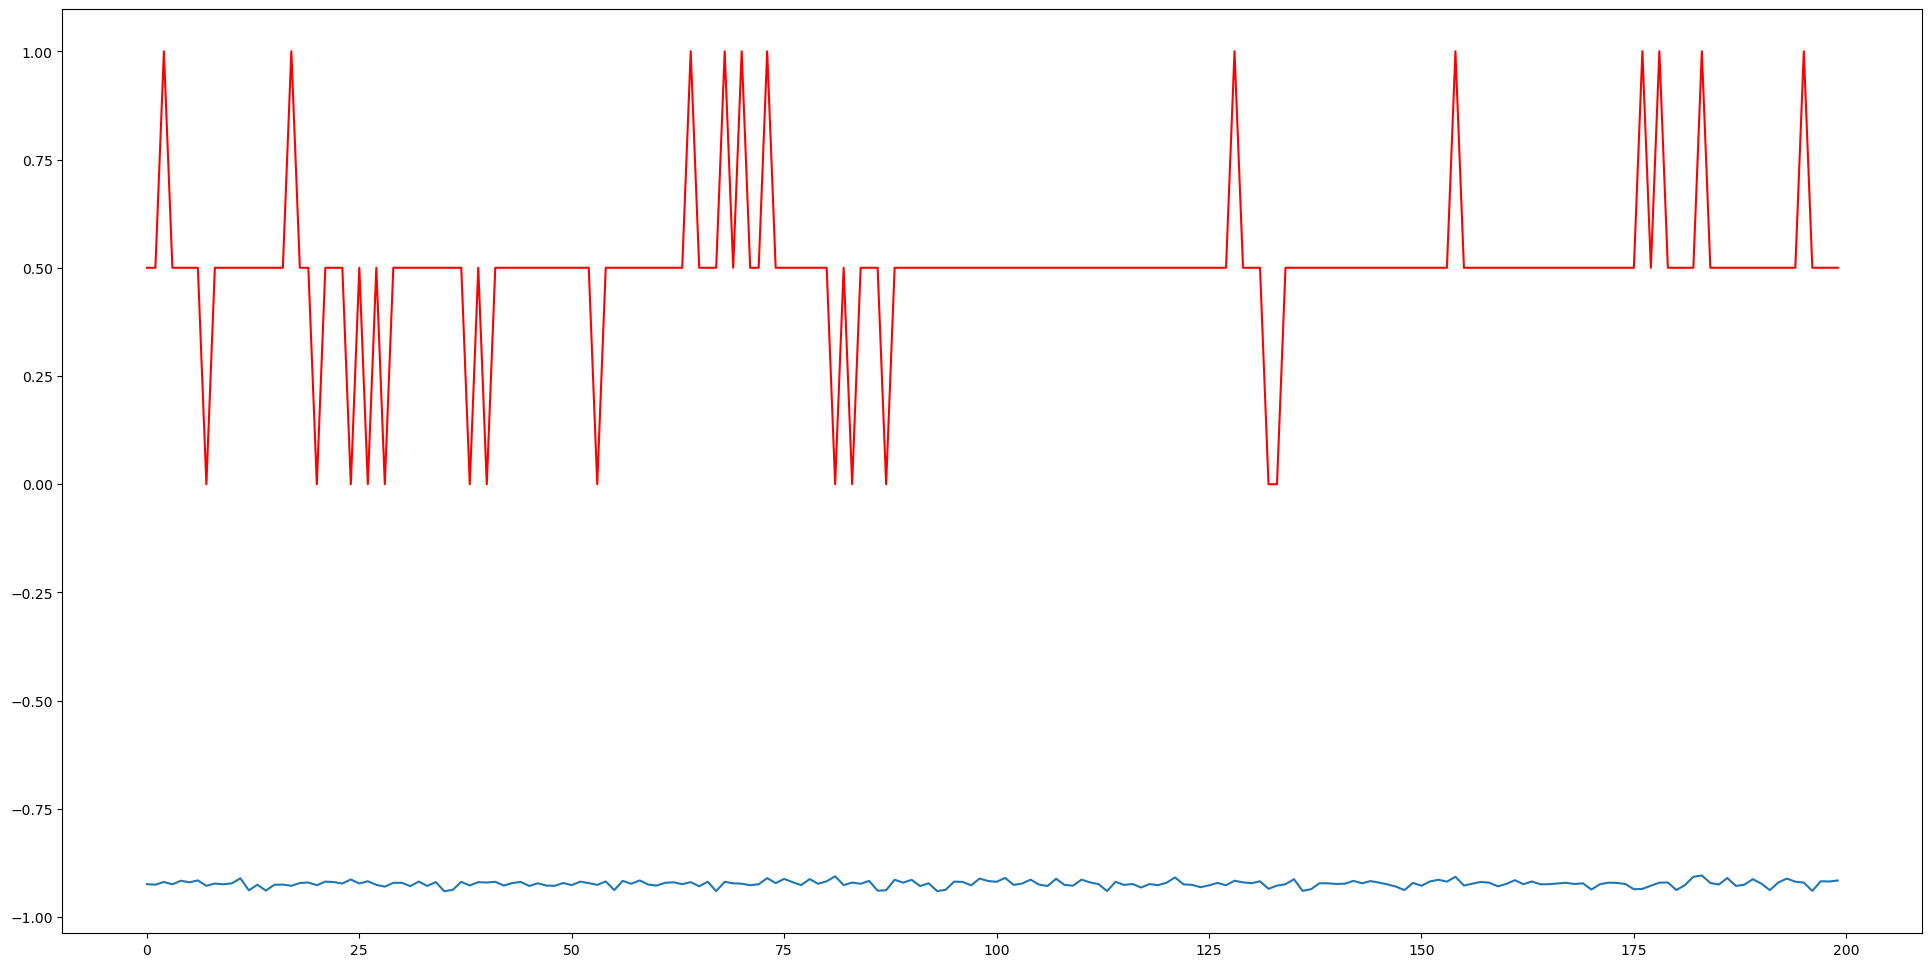

In [53]:
plt.figure(figsize=(24,12))
plt.plot(predictionsi[-200:])
plt.plot((y_test[-200:]),  'r')
plt.show